In [1]:
from google.colab import files


uploaded = files.upload()

Saving BTC-USDT.csv to BTC-USDT.csv


In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from datetime import datetime

In [3]:
# Loading the training dataset
dataset = 'C:\Users\saiko\Downloads\research\research\Technophile KDSH\Technophile KDSH\BTC-USDT.csv'
btcdata = pd.read_csv(dataset, parse_dates=True, index_col='Date',dayfirst=True)
btcdata

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.20020,14112.20020,13154.70020,13657.20020,13657.20020,1.029120e+10
2018-01-02,13625.00000,15444.59961,13163.59961,14982.09961,14982.09961,1.684660e+10
2018-01-03,14978.20020,15572.79981,14844.50000,15201.00000,15201.00000,1.687190e+10
2018-01-04,15270.70020,15739.70020,14522.20020,15599.20020,15599.20020,2.178320e+10
2018-01-05,15477.20020,17705.19922,15202.79981,17429.50000,17429.50000,2.384090e+10
...,...,...,...,...,...,...
2022-01-27,36841.87891,37148.32422,35629.28125,37138.23438,37138.23438,2.504143e+10
2022-01-28,37128.44531,37952.87891,36211.10938,37784.33203,37784.33203,2.223883e+10
2022-01-29,37780.71484,38576.26172,37406.47266,38138.17969,38138.17969,1.719418e+10


In [4]:
#training the btc-usdt
train_df = pd.read_csv('BTC-USDT.csv')
train_df['Date'] = pd.to_datetime(train_df['Date'],format='%d-%m-%Y')
train_df = train_df.sort_values(by='Date')
train_df['daily_return'] = train_df['Adj Close'].pct_change()
train_df = train_df.dropna()

In [5]:
from google.colab import files


uploaded = files.upload()

Saving BTC-USD jan1 23-dec 31 23.csv to BTC-USD jan1 23-dec 31 23.csv


In [6]:
#test data preprocessing
test_df = pd.read_csv('BTC-USD jan1 23-dec 31 23.csv')
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df = test_df.sort_values(by='Date')
test_df['daily_return'] = test_df['Adj Close'].pct_change()
test_df = test_df.dropna()

In [7]:
max_drawdown = -0.08

In [8]:
#building the lstm model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train_df['Adj Close'].values.reshape(-1, 1))
seq_length = 10

In [9]:
x, y = [], []
for i in range(len(scaled_data) - seq_length):
    x.append(scaled_data[i:i+seq_length, 0])
    y.append(scaled_data[i+seq_length, 0])

scaled_test_data = scaler.fit_transform(test_df['Adj Close'].values.reshape(-1, 1))

In [10]:
test_X, test_y = [], []
for i in range(len(scaled_test_data) - seq_length):
    test_X.append(scaled_test_data[i:i+seq_length, 0])
    test_y.append(scaled_test_data[i+seq_length, 0])

x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [11]:
#fitting the model
test_X, test_y = np.array(test_X), np.array(test_y)
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

x_train, x_test = x, test_X
y_train, y_test = y, test_y
lstm_input_shape = (x_train.shape[1], 1)
lstm_model = build_lstm_model(lstm_input_shape)
lstm_model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
47/47 [==============================] - 4s 11ms/step - loss: 0.0212
Epoch 2/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 3/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0012
Epoch 4/50
47/47 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 5/50
47/47 [==============================] - 1s 18ms/step - loss: 0.0011
Epoch 6/50
47/47 [==============================] - 1s 18ms/step - loss: 0.0011
Epoch 7/50
47/47 [==============================] - 1s 18ms/step - loss: 0.0010
Epoch 8/50
47/47 [==============================] - 1s 16ms/step - loss: 0.0010
Epoch 9/50
47/47 [==============================] - 1s 11ms/step - loss: 9.9590e-04
Epoch 10/50
47/47 [==============================] - 1s 11ms/step - loss: 9.2890e-04
Epoch 11/50
47/47 [==============================] - 1s 12ms/step - loss: 8.9664e-04
Epoch 12/50
47/47 [==============================] - 1s 11ms/step - loss: 9.8706e-04
Epoch 13/50
47/47 [==

In [12]:
# Make predictions
pred_y_train = lstm_model.predict(x_train)
pred_y_test = lstm_model.predict(x_test)

# Inverse transform predictions and actual values to the original scale
pred_y_train = scaler.inverse_transform(pred_y_train)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
pred_y_test = scaler.inverse_transform(pred_y_test)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

12/12 [==============================] - 0s 4ms/step


In [13]:
#calculating the rmse for train and test data
train_rmse = np.sqrt(mean_squared_error(y_train_actual, pred_y_train))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, pred_y_test))

print('train_rmse', train_rmse)
print('test_rmse', test_rmse)

train_rmse 495.64934303282365
test_rmse 813.8179450369194


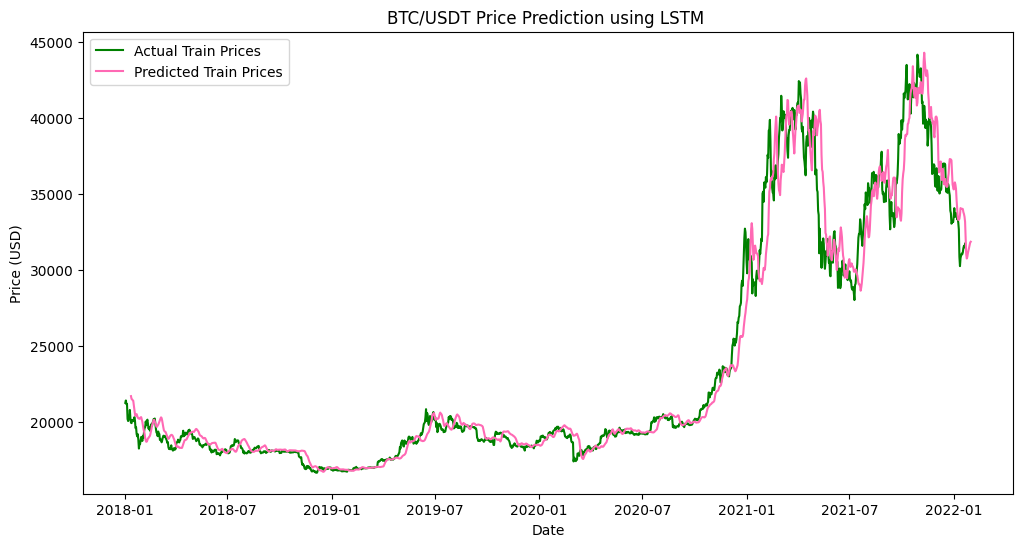

In [14]:
#representing the actual predicted outcomes of train data in visualization format
plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'][:len(y_train_actual)], y_train_actual, label='Actual Train Prices', color='green')
plt.plot(train_df['Date'][seq_length:len(y_train_actual)+seq_length], pred_y_train, label='Predicted Train Prices', color='hotpink')
plt.title('BTC/USDT Price Prediction using LSTM ')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()


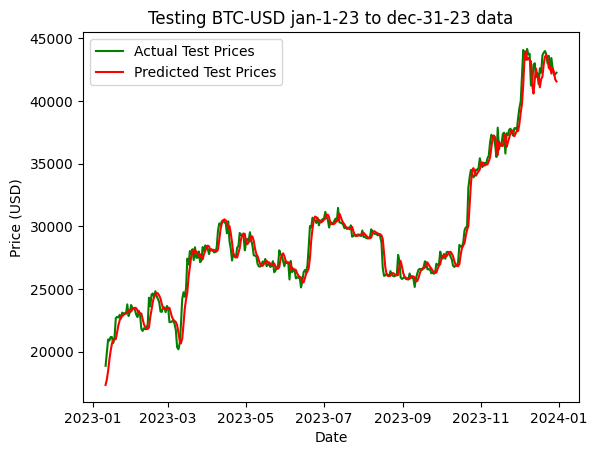

In [ ]:
test_dates_actual = test_df['Date'].values[seq_length-1:len(y_test_actual)+seq_length-1]
plt.plot(test_dates_actual, y_test_actual, label='Actual Test Prices', color='green')

# Corrected date range for predicted test prices
pred_test_dates = test_df['Date'].values[seq_length-1:len(y_test_actual)+seq_length-1]
plt.plot(pred_test_dates, pred_y_test, label='Predicted Test Prices', color='red')
plt.title('Testing BTC-USD jan-1-23 to dec-31-23 data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

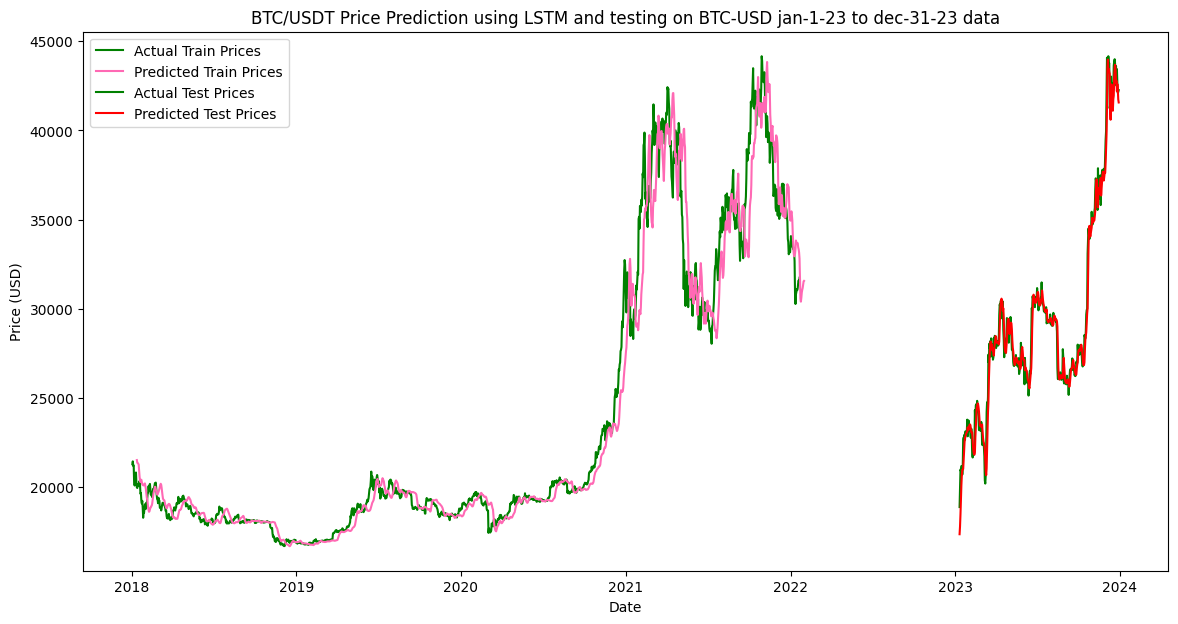

In [ ]:
#representing the actual and predicted outcomes of train and test data
plt.figure(figsize=(14, 7))
plt.plot(train_df['Date'][:len(y_train_actual)], y_train_actual, label='Actual Train Prices', color='green')
plt.plot(train_df['Date'][seq_length:len(y_train_actual)+seq_length], pred_y_train, label='Predicted Train Prices', color='hotpink')

# Corrected date range for actual test prices
test_dates_actual = test_df['Date'].values[seq_length-1:len(y_test_actual)+seq_length-1]
plt.plot(test_dates_actual, y_test_actual, label='Actual Test Prices', color='green')

# Corrected date range for predicted test prices
pred_test_dates = test_df['Date'].values[seq_length-1:len(y_test_actual)+seq_length-1]
plt.plot(pred_test_dates, pred_y_test, label='Predicted Test Prices', color='red')

# Add labels and legend
plt.title('BTC/USDT Price Prediction using LSTM and testing on BTC-USD jan-1-23 to dec-31-23 data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Show the plot
plt.show()

In [16]:
#loading the dataset
dataset = 'BTC-USDT.csv'  # Replace with the path to your dataset
btcdata = pd.read_csv(dataset, parse_dates=True, index_col='Date',dayfirst=True)
btcdata

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.20020,14112.20020,13154.70020,13657.20020,13657.20020,1.029120e+10
2018-01-02,13625.00000,15444.59961,13163.59961,14982.09961,14982.09961,1.684660e+10
2018-01-03,14978.20020,15572.79981,14844.50000,15201.00000,15201.00000,1.687190e+10
2018-01-04,15270.70020,15739.70020,14522.20020,15599.20020,15599.20020,2.178320e+10
2018-01-05,15477.20020,17705.19922,15202.79981,17429.50000,17429.50000,2.384090e+10
...,...,...,...,...,...,...
2022-01-27,36841.87891,37148.32422,35629.28125,37138.23438,37138.23438,2.504143e+10
2022-01-28,37128.44531,37952.87891,36211.10938,37784.33203,37784.33203,2.223883e+10
2022-01-29,37780.71484,38576.26172,37406.47266,38138.17969,38138.17969,1.719418e+10


In [17]:
# Default consideration of Transaction costs and slippage
transaction_cost_rate = 0.0020  # 0.20%
slippage = 0.005  # 0.5%

In [34]:
# Applying Trend-Following Strategy
def trend_strategy(df, short_window=10, long_window=50):
    df1 = pd.DataFrame(index=df.index)
    df1['signal'] = 0.0

    # Create short simple moving average
    df1['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    df1['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Generate signals based on moving average crossover
    df1['signal'][short_window:] = np.where(df1['short_mavg'][short_window:] > df1['long_mavg'][short_window:], 1.0, -1.0)

    # Generate trading orders
    df1['positions'] = df1['signal'].diff()

    return df1

# Applying Mean-Reversion Strategy
def meanreversion_strategy(df, lookback_period=20, z_score_threshold=1.0):
    df1 = pd.DataFrame(index=df.index)
    df1['signal'] = 0.0

    # Calculate the rolling mean and standard deviation
    rolling_mean = df['Close'].rolling(window=lookback_period).mean()
    rolling_std = df['Close'].rolling(window=lookback_period).std()

    # Calculate z-score
    z_score = (df['Close'] - rolling_mean) / rolling_std

    # Generate signals based on z-score
    df1['signal'][z_score < -z_score_threshold] = 1.0
    df1['signal'][z_score > z_score_threshold] = -1.0

    # Generate trading orders
    df1['positions'] = df1['signal'].diff()

    return df1
#Applying Momentum-Centric Strategy
def momentumcentric_strategy(df, short_window=50, long_window=200):
    df1 = pd.DataFrame(index=df.index)
    df1['signal'] = 0.0

    # Create short simple moving average
    df1['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    df1['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Generate signals based on moving average crossover
    df1['signal'][short_window:] = np.where(df1['short_mavg'][short_window:] > df1['long_mavg'][short_window:], 1.0, -1.0)

    # Generate trading orders
    df1['positions'] = df1['signal'].diff()

    return df1
#Applying Machine learning approach
def machinelearning_strategy(df):
    df['SMA50'] = df['Close'].rolling(window=50).mean()
    df['SMA200'] = df['Close'].rolling(window=200).mean()
    df.dropna(inplace=True)

    df['Signal'] = np.where(df['SMA50'] > df['SMA200'], 1, -1)

    X = df[['SMA50', 'SMA200']]
    y = df['Signal']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)

    df1 = pd.DataFrame(index=X_test.index)
    df1['signal'] = np.where(y_pred == 1, 1.0, -1.0)

    df1['positions'] = df1['signal'].diff()

    # Evaluate the model on the training set
    training_accuracy = accuracy_score(y_train, clf.predict(X_train_scaled))
    print(f"Training Accuracy: {training_accuracy:.2%}")

    # Evaluate the model on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {test_accuracy:.2%}")

    return df1

In [31]:
# Performing Backtesting
def backtest_strategy(df, signals, transaction_cost_rate, slippage):
    capital = 100000  # Initial capital in USDT
    position = 0  # Initial position

    # find daily returns
    df['returns'] = df['Close'].pct_change()

    # Apply signals to generate trading orders
    df['positions'] = signals['positions']

    # Apply transaction costs and slippage
    df['positions'] = df['positions'].shift(1)  # Shift positions to avoid lookahead bias
    df['positions'].fillna(0, inplace=True)  # Fill NaN in the first row
    df['transaction_costs'] = abs(df['positions'] - df['positions'].shift(1)) * transaction_cost_rate
    df['slippage'] = abs(df['positions'] - df['positions'].shift(1)) * slippage

    # find  daily portfolio value
    df['portfolio_value'] = capital + (df['returns'] * capital * position) - df['transaction_costs'] - df['slippage']

    # find cumulative returns
    df['cumulative_returns'] = (1 + df['returns']).cumprod() - 1
    df['cumulative_portfolio_returns'] = (1 + df['returns'] * df['positions']).cumprod() - 1

    annual_returns = (df['cumulative_portfolio_returns'].iloc[-1] + 1) ** (252 / len(df.index)) - 1
    max_drawdown = -df['cumulative_portfolio_returns'].min()

    print(f'Annual Returns: {annual_returns * 100:.2f}%')
    print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%\n')

    return df, annual_returns, max_drawdown

Annual Returns: 23.79%
Maximum Drawdown: -0.00%



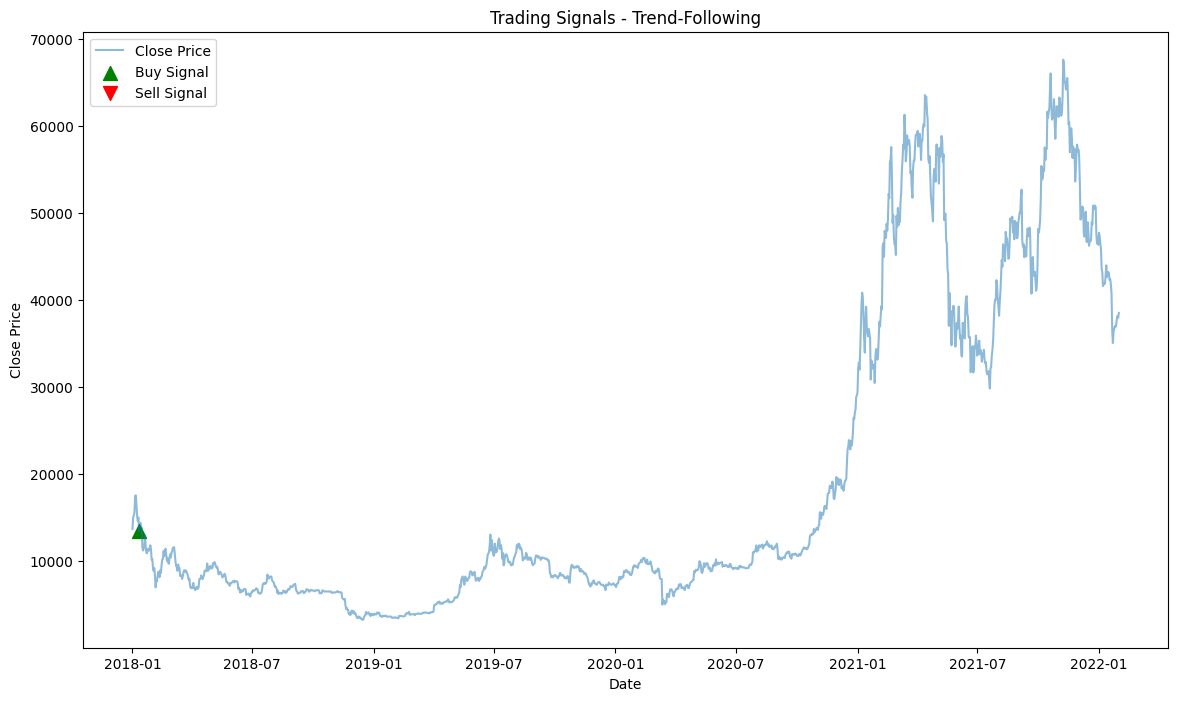

In [32]:
# Applying Visualize Strategy
def visualize_strategy(data, df1, strategy_name):
    plt.figure(figsize=(14, 8))
    plt.plot(data['Close'], label='Close Price', alpha=0.5)

    # Plot buy signals
    buy_signals = df1[df1['positions'] == 1].index
    plt.scatter(buy_signals, data.loc[buy_signals, 'Close'],
                marker='^', color='g', label='Buy Signal', s=100)

    # Plot sell signals
    sell_signals = df1[df1['positions'] == -1].index
    plt.scatter(sell_signals, data.loc[sell_signals, 'Close'],
                marker='v', color='r', label='Sell Signal', s=100)

    plt.title(f'Trading Signals - {strategy_name}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Backtest and Analyze Trend-Following Strategy
signals_trend_following = trend_strategy(btcdata)
btcdata_backtest_trend_following, trend_following_annual_returns, trend_following_drawdown = backtest_strategy(btcdata, signals_trend_following, transaction_cost_rate, slippage)
visualize_strategy(btcdata, signals_trend_following, 'Trend-Following')

Annual Returns: 23.79%
Maximum Drawdown: -0.00%



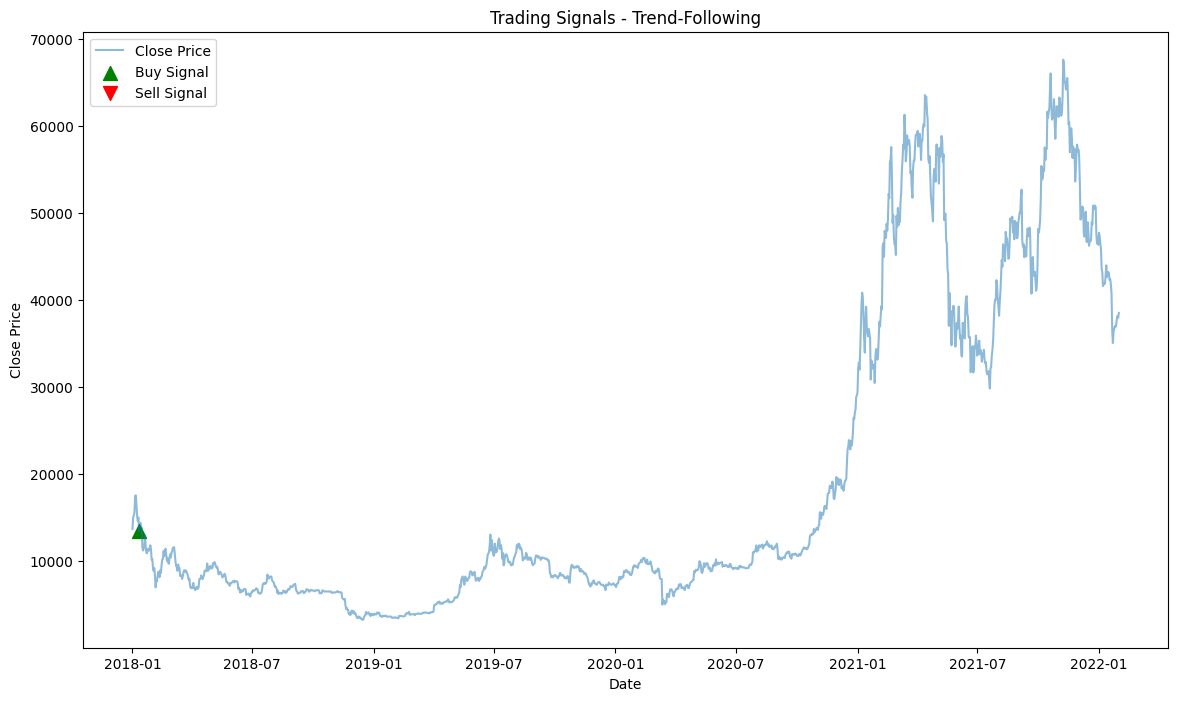

In [27]:
# Backtest and Analyze Each Strategy
signals_trend_following = trend_strategy(btcdata)
btcdata_backtest_trend_following, trend_following_annual_returns, trend_following_drawdown = backtest_strategy(btcdata, signals_trend_following, transaction_cost_rate, slippage)
visualize_strategy(btcdata, signals_trend_following, 'Trend-Following')

Annual Returns: 0.05%
Maximum Drawdown: 34.22%



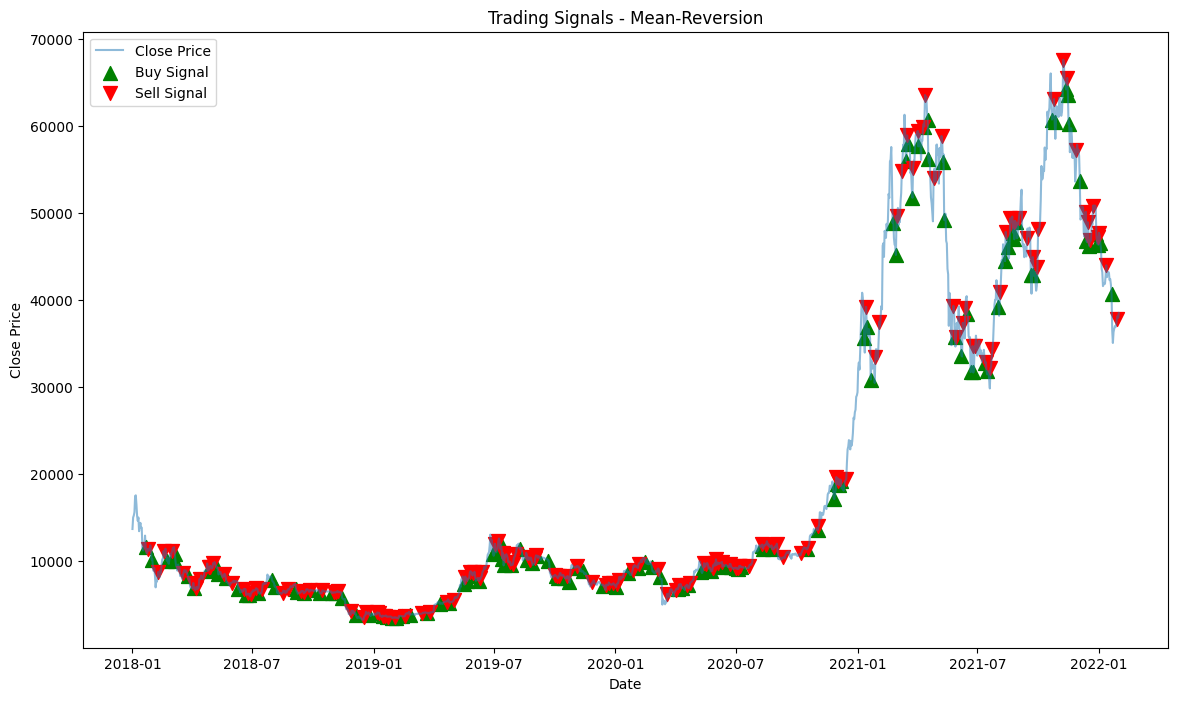

In [33]:
# Backtest and Analyze meanreversion strategy Strategy
signals_mean_reversion = meanreversion_strategy(btcdata)
btcdata_backtest_mean_reversion, mean_reversion_annual_returns, mean_reversion_drawdown = backtest_strategy(btcdata, signals_mean_reversion, transaction_cost_rate, slippage)
visualize_strategy(btcdata, signals_mean_reversion, 'Mean-Reversion')

Annual Returns: -2.08%
Maximum Drawdown: 11.69%



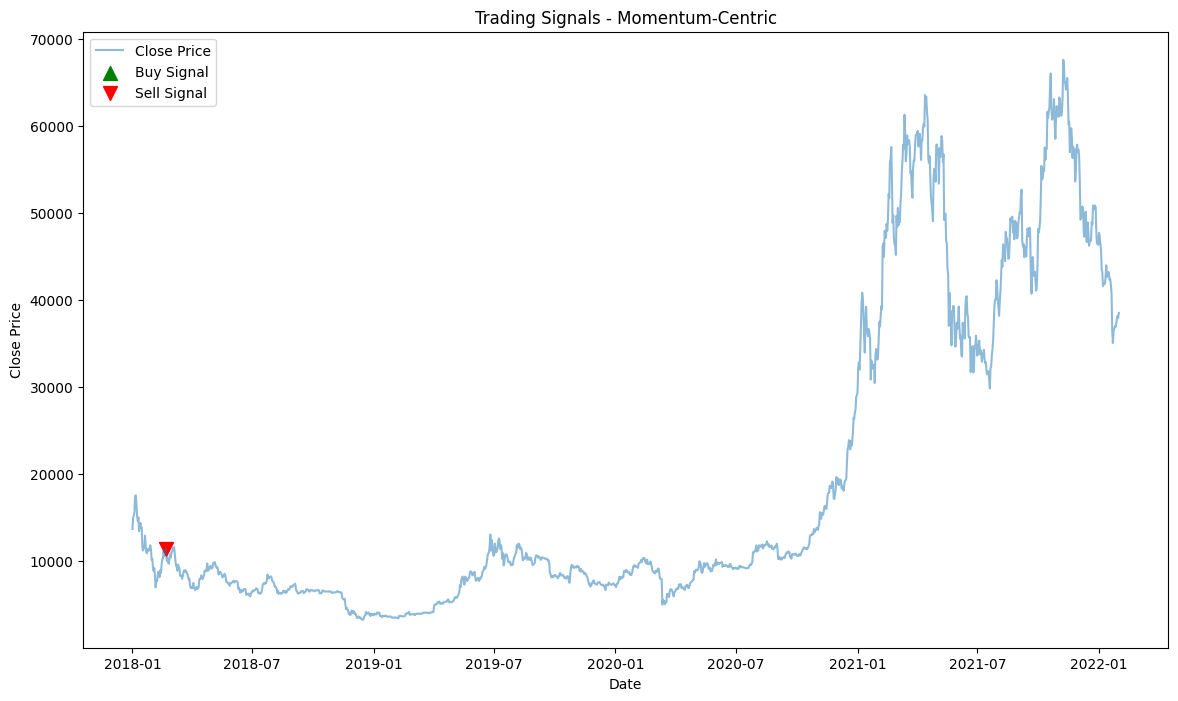

In [35]:
# Backtest and Analyze Momentum-Centric Strategy
signals_momentum_centric = momentumcentric_strategy(btcdata)
btc_data_backtest_momentum_centric, momentum_centric_annual_returns, momentum_centric_drawdown = backtest_strategy(btcdata, signals_momentum_centric, transaction_cost_rate, slippage)
visualize_strategy(btcdata, signals_momentum_centric, 'Momentum-Centric')

Training Accuracy: 100.00%
Test Accuracy: 99.48%
Annual Returns: 6.35%
Maximum Drawdown: -0.00%



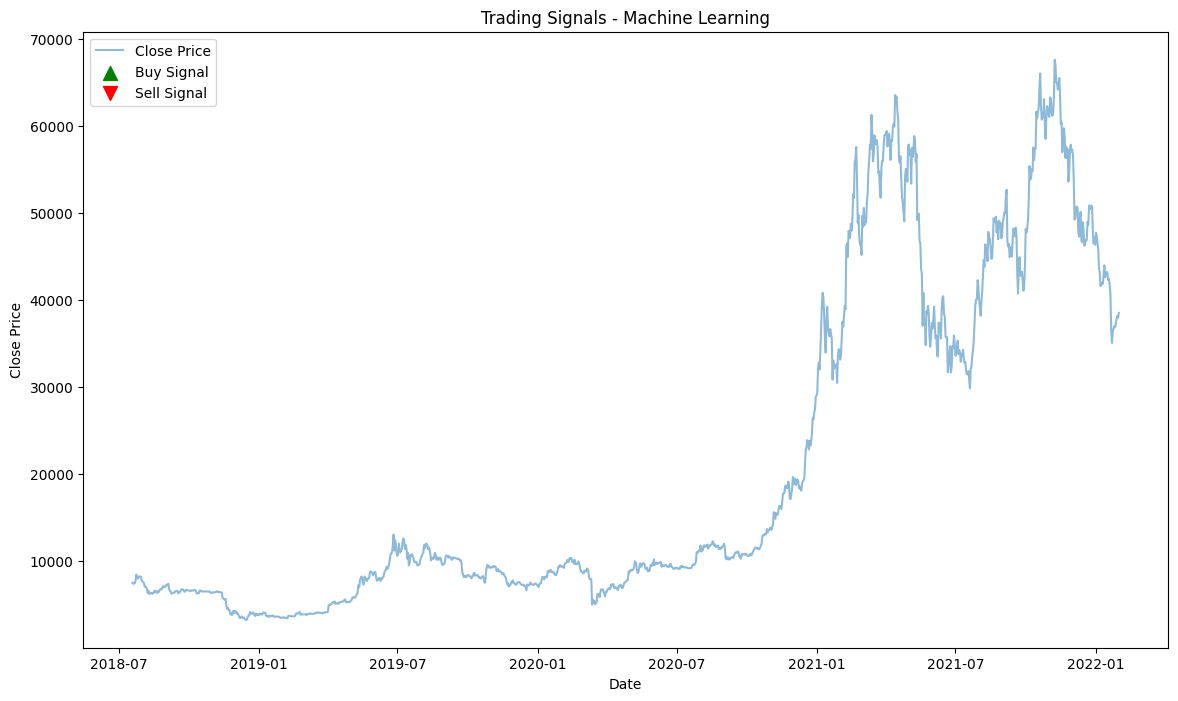

In [36]:
# Backtest and Analyze Machine Learning Strategy
signals_machine_learning = machinelearning_strategy(btcdata)
btc_data_backtest_machine_learning, machine_learning_annual_returns, machine_learning_drawdown = backtest_strategy(btcdata, signals_machine_learning, transaction_cost_rate, slippage)
visualize_strategy(btcdata, signals_machine_learning, 'Machine Learning')

In [37]:
# Load  dataset
dataset_path = 'BTC-USDT.csv'  # Replace with the path to your dataset
btcdata = pd.read_csv(dataset_path, parse_dates=True, index_col='Date',dayfirst=True)
btcdata

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.20020,14112.20020,13154.70020,13657.20020,13657.20020,1.029120e+10
2018-01-02,13625.00000,15444.59961,13163.59961,14982.09961,14982.09961,1.684660e+10
2018-01-03,14978.20020,15572.79981,14844.50000,15201.00000,15201.00000,1.687190e+10
2018-01-04,15270.70020,15739.70020,14522.20020,15599.20020,15599.20020,2.178320e+10
2018-01-05,15477.20020,17705.19922,15202.79981,17429.50000,17429.50000,2.384090e+10
...,...,...,...,...,...,...
2022-01-27,36841.87891,37148.32422,35629.28125,37138.23438,37138.23438,2.504143e+10
2022-01-28,37128.44531,37952.87891,36211.10938,37784.33203,37784.33203,2.223883e+10
2022-01-29,37780.71484,38576.26172,37406.47266,38138.17969,38138.17969,1.719418e+10


In [38]:
# Function to implement trend-following strategy with risk management and calculating the additional metrics
def trend_followingstrategy_with_risk_management(df, short_window=10, long_window=50, risk_per_trade=0.05):
    df1 = pd.DataFrame(index=df.index)
    df1['signal'] = 0.0

    # Create short simple moving average
    df1['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    df1['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Generate signals based on moving average crossover
    df1['signal'][short_window:] = np.where(df1['short_mavg'][short_window:] > df1['long_mavg'][short_window:], 1.0, -1.0)

    # Generate trading orders
    df1['positions'] = df1['signal'].diff()

    # Implement Risk Management
    capital = 100000  # Initial capital in USDT
    position = 0  # Initial position

    df['returns'] = df['Close'].pct_change()

    df['positions'] = df1['positions']

    stop_loss_triggered = False

    for i in range(1, len(df)):
        try:
            if df['positions'][i - 1] == 1:  # Long position
                if not stop_loss_triggered and df['Close'][i] <= df['Close'][i - 1] * (1 - risk_per_trade):
                    df['positions'][i] = 0  # Exit the position
                    stop_loss_triggered = True
                elif stop_loss_triggered:
                    df['positions'][i] = 0  # Exit the position if stop-loss is triggered
        except KeyError:
            pass  # Ignore KeyError
    # Calculate additional metrics
    df['cumulative_returns'] = (1 + df['returns']).cumprod() - 1
    df['gross_profit'] = np.where((df['returns'] > 0) & (df['positions'] == 1), df['returns'], 0)
    df['gross_loss'] = np.where((df['returns'] < 0) & (df['positions'] == 1), df['returns'], 0)
    df['net_profit'] = df['gross_profit'].sum() + df['gross_loss'].sum()
    df['total_closed_trades'] = df['positions'].eq(1).sum()
    df['win_rate'] = df['gross_profit'].gt(0).sum() / df['total_closed_trades']
    df['max_drawdown'] = -df['cumulative_returns'].min()
    df['average_winning_trade'] = df['gross_profit'].mean()
    df['average_losing_trade'] = df['gross_loss'].mean()
    df['buy_and_hold_return'] = (1 + df['returns']).prod() - 1
    df['largest_losing_trade'] = df['gross_loss'].min()
    df['largest_winning_trade'] = df['gross_profit'].max()
    df['sharpe_ratio'] = (df['returns'].mean() / df['returns'].std()) * np.sqrt(252)
    df['sortino_ratio'] = (df['returns'].mean() / df['returns'].loc[df['returns'] < 0].std()) * np.sqrt(252)
    df['average_holding_duration'] = df['positions'].eq(1).sum() / df['total_closed_trades']

    # Print additional metrics
    print("Additional Metrics:")
    print(f'Gross Profit: {df["gross_profit"].sum()}')
    print(f'Net Profit: {df["net_profit"]}')
    print(f'Total Closed Trades: {df["total_closed_trades"]}')
    print('Win Rate: {:.2f}%'.format(df["win_rate"].iloc[0] * 100))
    print('Max Drawdown: {:.2f}%'.format(df["max_drawdown"].iloc[0] * 100))


    print(f'Average Winning Trade: {df["average_winning_trade"]}')
    print(f'Average Losing Trade: {df["average_losing_trade"]}')
    print('Buy and Hold Return of BTC: {:.2f}%'.format(df["buy_and_hold_return"].iloc[0] * 100))


    print(f'Largest Losing Trade: {df["largest_losing_trade"]}')
    print(f'Largest Winning Trade: {df["largest_winning_trade"]}')
    print(f'Sharpe Ratio: {df["sharpe_ratio"]}')
    print(f'Sortino Ratio: {df["sortino_ratio"]}')
    print(f'Average Holding Duration per Trade: {df["average_holding_duration"]}\n')
    print(df)
    print(df.columns)

    return df
# Backtest and analyze the trend-following strategy with risk management
btc_data_backtest = trend_followingstrategy_with_risk_management(btcdata)



Additional Metrics:
Gross Profit: 0.0
Net Profit: Date
2018-01-01   -0.104686
2018-01-02   -0.104686
2018-01-03   -0.104686
2018-01-04   -0.104686
2018-01-05   -0.104686
                ...   
2022-01-27   -0.104686
2022-01-28   -0.104686
2022-01-29   -0.104686
2022-01-30   -0.104686
2022-01-31   -0.104686
Name: net_profit, Length: 1492, dtype: float64
Total Closed Trades: Date
2018-01-01    1
2018-01-02    1
2018-01-03    1
2018-01-04    1
2018-01-05    1
             ..
2022-01-27    1
2022-01-28    1
2022-01-29    1
2022-01-30    1
2022-01-31    1
Name: total_closed_trades, Length: 1492, dtype: int64
Win Rate: 0.00%
Max Drawdown: 76.30%
Average Winning Trade: Date
2018-01-01    0.0
2018-01-02    0.0
2018-01-03    0.0
2018-01-04    0.0
2018-01-05    0.0
             ... 
2022-01-27    0.0
2022-01-28    0.0
2022-01-29    0.0
2022-01-30    0.0
2022-01-31    0.0
Name: average_winning_trade, Length: 1492, dtype: float64
Average Losing Trade: Date
2018-01-01   -0.00007
2018-01-02   -0.000

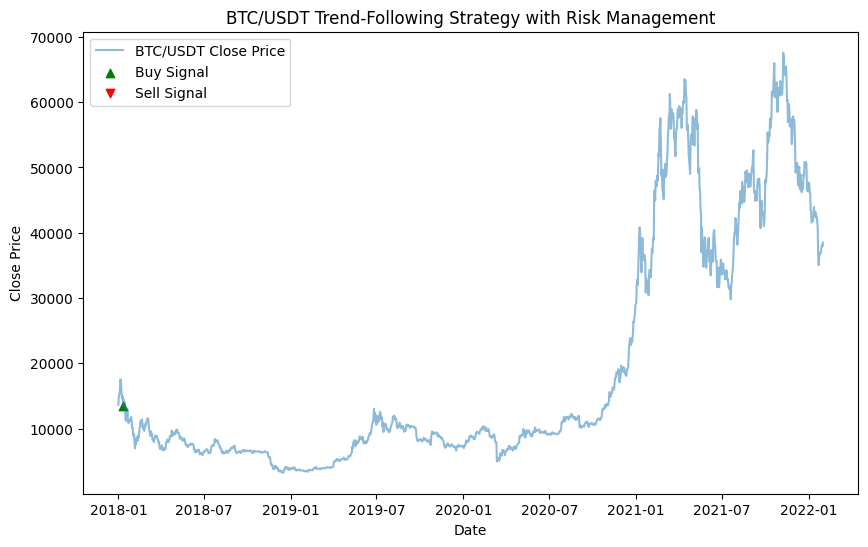

In [39]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(btcdata['Close'], label='BTC/USDT Close Price', alpha=0.5)
buy_signals = btc_data_backtest.index[btc_data_backtest['positions'] == 1.0]
sell_signals = btc_data_backtest.index[btc_data_backtest['positions'] == -1.0]

plt.scatter(buy_signals, btc_data_backtest['Close'][btc_data_backtest['positions'] == 1.0], label='Buy Signal', marker='^', color='g')
plt.scatter(sell_signals, btc_data_backtest['Close'][btc_data_backtest['positions'] == -1.0], label='Sell Signal', marker='v', color='r')

plt.title('BTC/USDT Trend-Following Strategy with Risk Management')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [40]:
#with new featurs
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def machinelearning_strategy_with_new_features(df, short_window=10, long_window=50):
    # Create short simple moving average
    df['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    df['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Generate signals based on moving average crossover
    df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1, -1)

    df.dropna(inplace=True)

    X = df[['short_mavg', 'long_mavg', 'returns']]  # Add other features as needed
    y = df['signal']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)

    df1 = pd.DataFrame(index=X_test.index)
    df1['signal'] = np.where(y_pred == 1, 1.0, -1.0)

    df1['positions'] = df1['signal'].diff()

    # Evaluate the model on the training set
    training_accuracy = accuracy_score(y_train, clf.predict(X_train_scaled))
    print(f"Training Accuracy: {training_accuracy:.2%}")

    # Evaluate the model on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {test_accuracy:.2%}")

    return df1


Training Accuracy: 100.00%
Test Accuracy: 95.98%
Annual Returns: 4.07%
Maximum Drawdown: 55.25%



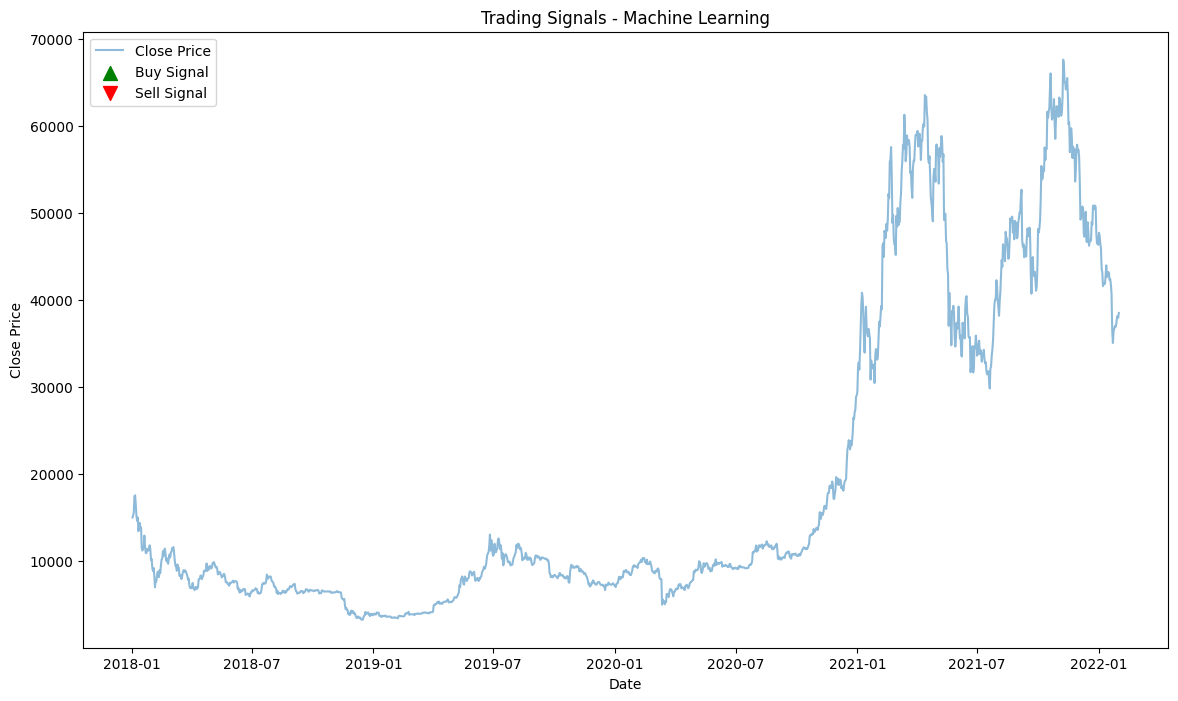

In [ ]:
# Backtest and Analyze Machine Learning Strategy
df1_machine_learning =  machinelearning_strategy_with_new_features(btcdata)
btc_data_backtest_machine_learning, machine_learning_annual_returns, machine_learning_drawdown = backtest_strategy(btcdata, df1_machine_learning, transaction_cost_rate, slippage)
visualize_strategy(btcdata, signals_machine_learning, 'Machine Learning')

In [ ]:
def meanreversion_strategy_with_new_features(df, lookback_period=30, z_score_threshold=1.0, short_window=10, long_window=50):
    df1 = pd.DataFrame(index=df.index)
    df1['signal'] = 0.0

    # Create short simple moving average
    df['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    df['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Calculate the rolling mean and standard deviation
    rolling_mean = df['Close'].rolling(window=lookback_period).mean()
    rolling_std = df['Close'].rolling(window=lookback_period).std()

    # Calculate z-score
    z_score = (df['Close'] - rolling_mean) / rolling_std

    # Generate signals based on z-score and moving average crossover
    df1['signal'][z_score < -z_score_threshold] = 1.0
    df1['signal'][z_score > z_score_threshold] = -1.0
    df1['signal'][(df['short_mavg'] > df['long_mavg']) & (z_score > -z_score_threshold)] = 0.0

    # Generate trading orders
    df1['positions'] = df1['signal'].diff()

    return df1

Annual Returns: -8.97%
Maximum Drawdown: 55.10%



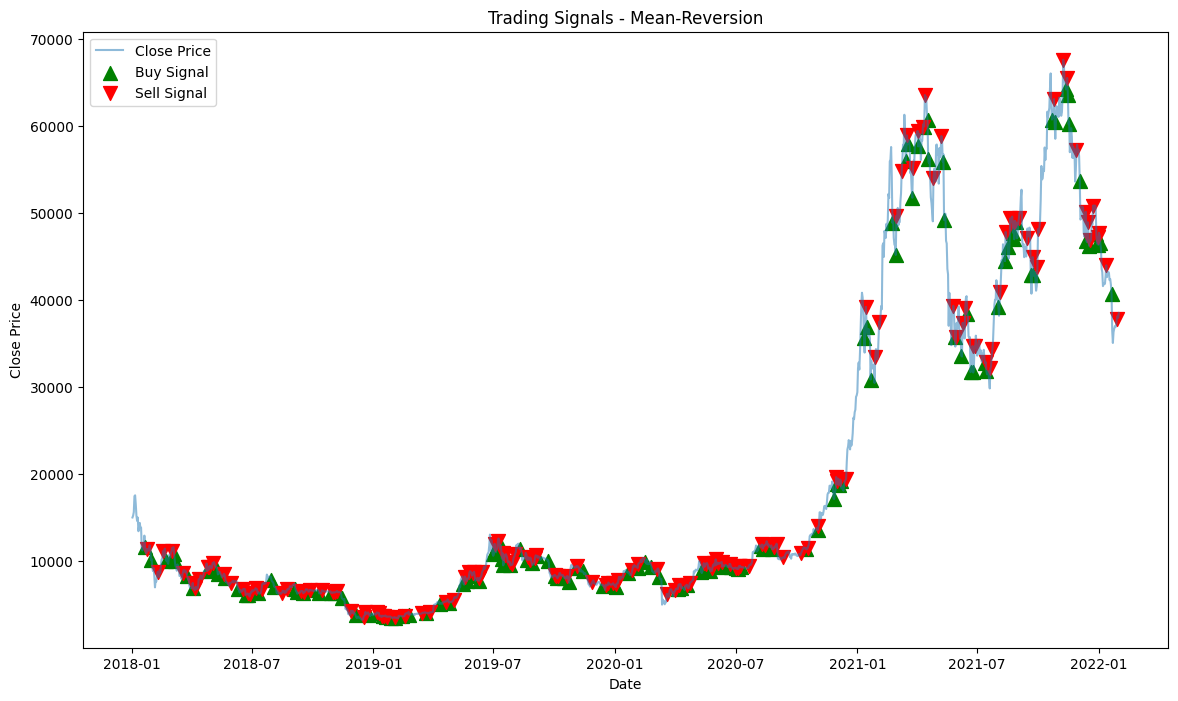

In [ ]:
df1_mean_reversion = meanreversion_strategy_with_new_features(btcdata)
btcdata_backtest_mean_reversion, mean_reversion_annual_returns, mean_reversion_drawdown = backtest_strategy(btcdata, df1_mean_reversion, transaction_cost_rate, slippage)
visualize_strategy(btcdata, signals_mean_reversion, 'Mean-Reversion')

In [ ]:
def momentumcentric_strateg_ywith_new_features(df, short_window=50, long_window=200):
    df1 = pd.DataFrame(index=df.index)
    df1['signal'] = 0.0

    # Create short simple moving average
    df1['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average
    df1['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Generate signals based on moving average crossover
    df1['signal'][short_window:] = np.where(df1['short_mavg'][short_window:] > df1['long_mavg'][short_window:], 1.0, -1.0)

    # Generate trading orders
    df1['positions'] = df1['signal'].diff()

    return df1

Annual Returns: -2.05%
Maximum Drawdown: 11.56%



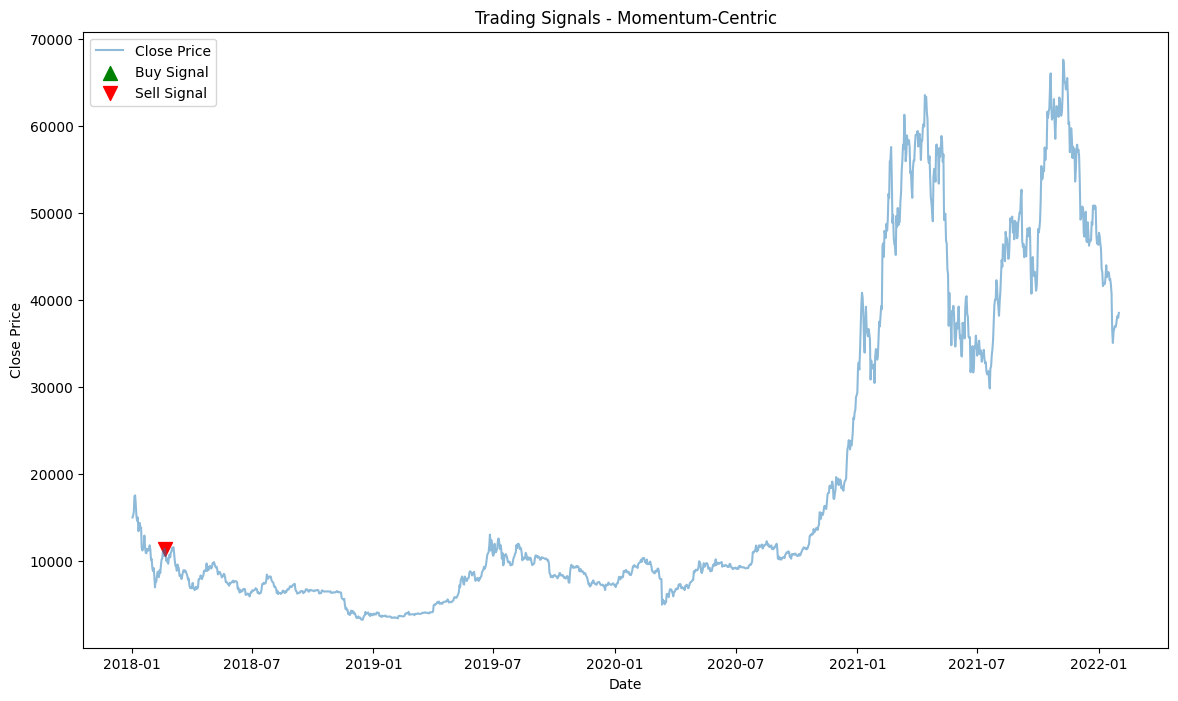

In [ ]:
# Backtest and Analyze Momentum-Centric Strategy
df1_momentum_centric = momentumcentric_strateg_ywith_new_features(btcdata)
btc_data_backtest_momentum_centric, momentum_centric_annual_returns, momentum_centric_drawdown = backtest_strategy(btcdata, df1_momentum_centric, transaction_cost_rate, slippage)
visualize_strategy(btcdata, signals_momentum_centric, 'Momentum-Centric')

In [42]:
# Loading the test dataset jan-dec
data = "BTC-USD jan1 23-dec 31 23.csv"
test_btcdata = pd.read_csv(data, parse_dates=True, index_col='Date',dayfirst=True)
test_btcdata

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566
...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


Annual Returns: 10.30%
Maximum Drawdown: -0.00%



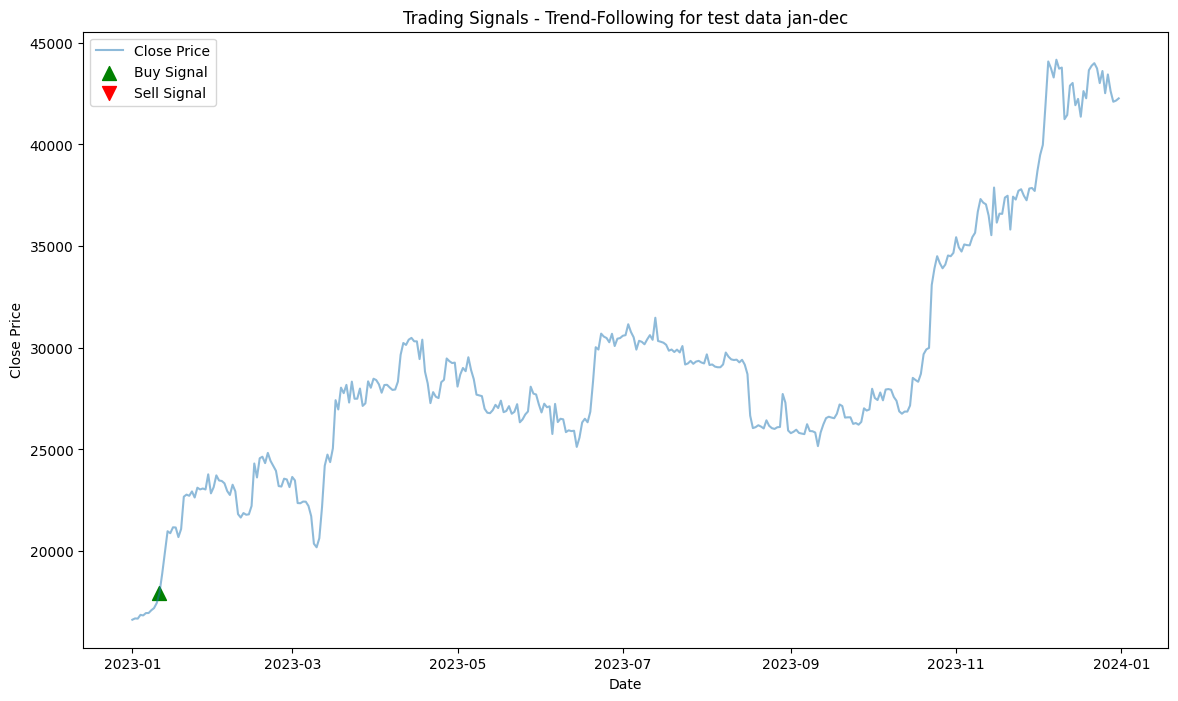

In [44]:
# Backtest and Analyze Trend-Following Strategy for test data jan-dec
signals_trend_following = trend_strategy(test_btcdata)
test_btcdata_backtest_trend_following, trend_following_annual_returns, trend_following_drawdown = backtest_strategy(test_btcdata, signals_trend_following, transaction_cost_rate, slippage)
visualize_strategy(test_btcdata, signals_trend_following, 'Trend-Following for test data jan-dec')

Annual Returns: 16.01%
Maximum Drawdown: 10.20%



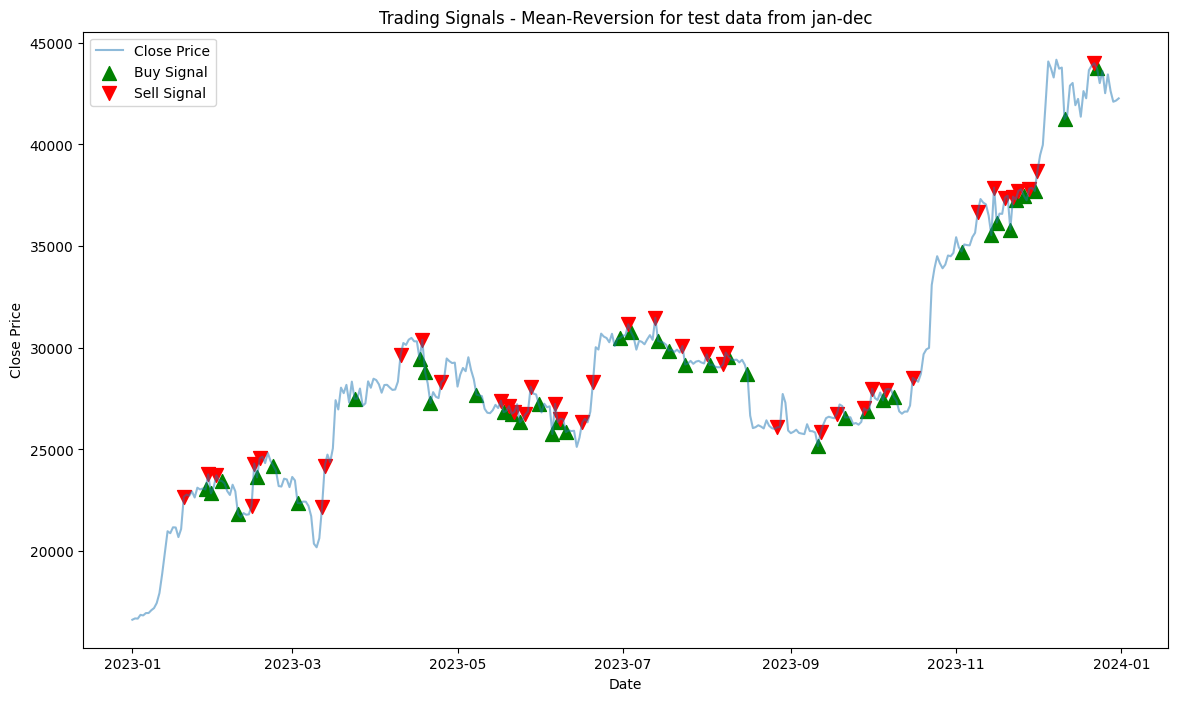

In [46]:
# Backtest and Analyze mean-reversion Strategy for test data
signals_mean_reversion = meanreversion_strategy(test_btcdata)
test_btcdata_backtest_mean_reversion, mean_reversion_annual_returns, mean_reversion_drawdown = backtest_strategy(test_btcdata, signals_mean_reversion, transaction_cost_rate, slippage)
visualize_strategy(btcdata, signals_mean_reversion, 'Mean-Reversion for test data from jan-dec')

Annual Returns: -2.55%
Maximum Drawdown: 4.59%



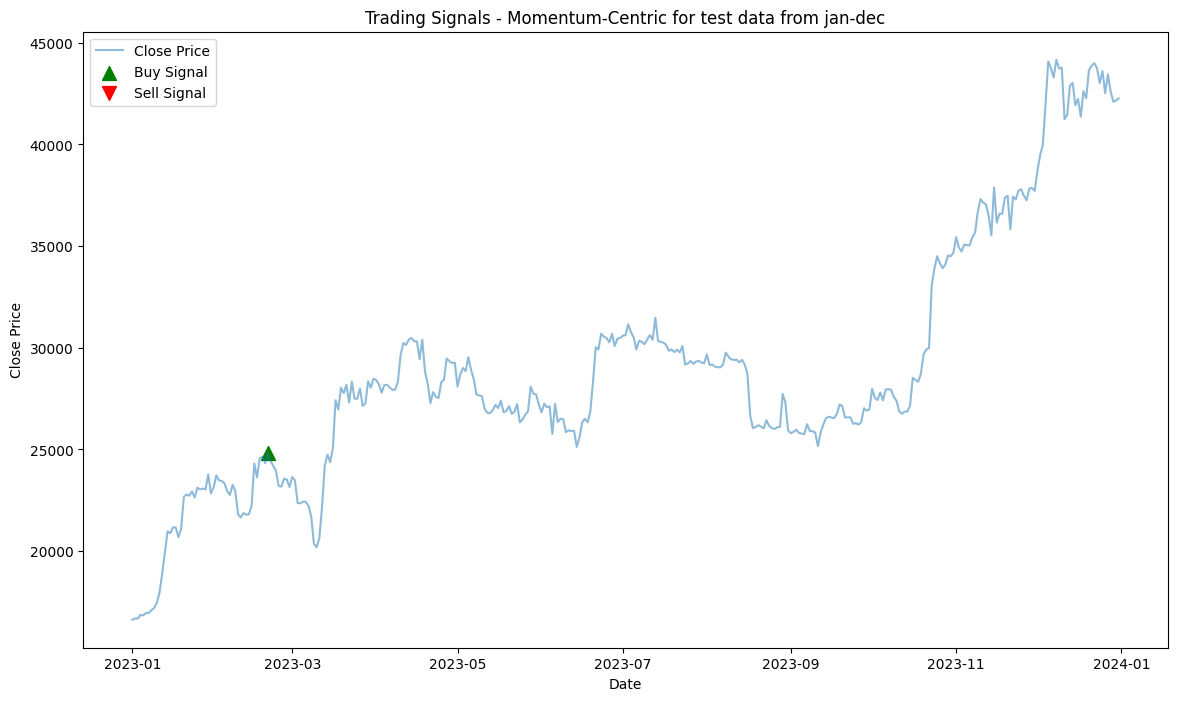

In [47]:
# Backtest and Analyze Momentum-Centric Strategy for test data
signals_momentum_centric = momentumcentric_strategy(test_btcdata)
test_btc_data_backtest_momentum_centric, momentum_centric_annual_returns, momentum_centric_drawdown = backtest_strategy(test_btcdata, signals_momentum_centric, transaction_cost_rate, slippage)
visualize_strategy(btcdata, signals_momentum_centric, 'Momentum-Centric for test data from jan-dec')

In [60]:

# Backtest and analyze the trend-following strategy with risk management for test data jan-dec
btc_data_backtest = trend_followingstrategy_with_risk_management(test_btcdata)



Additional Metrics:
Gross Profit: 0.028006150983947986
Net Profit: Date
2023-01-01    0.028006
2023-01-02    0.028006
2023-01-03    0.028006
2023-01-04    0.028006
2023-01-05    0.028006
                ...   
2023-12-27    0.028006
2023-12-28    0.028006
2023-12-29    0.028006
2023-12-30    0.028006
2023-12-31    0.028006
Name: net_profit, Length: 365, dtype: float64
Total Closed Trades: Date
2023-01-01    1
2023-01-02    1
2023-01-03    1
2023-01-04    1
2023-01-05    1
             ..
2023-12-27    1
2023-12-28    1
2023-12-29    1
2023-12-30    1
2023-12-31    1
Name: total_closed_trades, Length: 365, dtype: int64
Win Rate: 100.00%
Max Drawdown: -0.33%
Average Winning Trade: Date
2023-01-01    0.000077
2023-01-02    0.000077
2023-01-03    0.000077
2023-01-04    0.000077
2023-01-05    0.000077
                ...   
2023-12-27    0.000077
2023-12-28    0.000077
2023-12-29    0.000077
2023-12-30    0.000077
2023-12-31    0.000077
Name: average_winning_trade, Length: 365, dtype: float

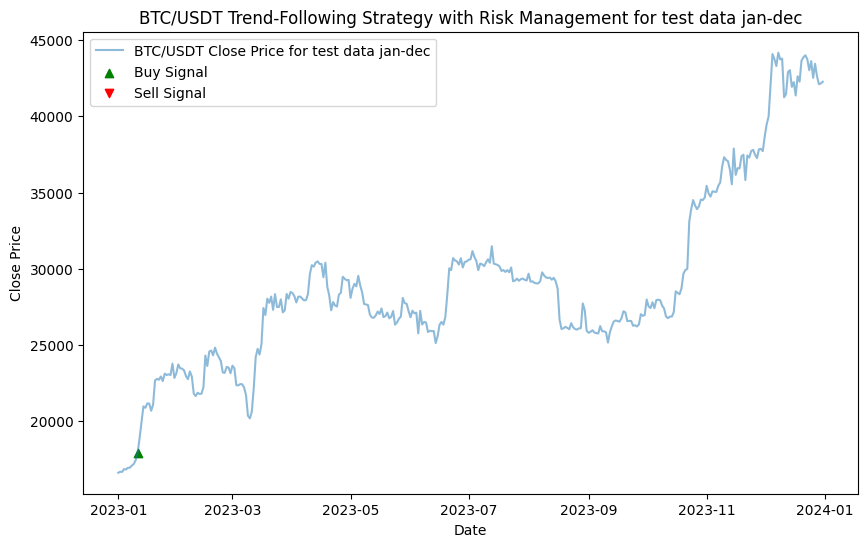

In [49]:
# Visualize the results (you may need to modify this based on your preferred visualization library)
plt.figure(figsize=(10, 6))
plt.plot(test_btcdata['Close'], label='BTC/USDT Close Price for test data jan-dec', alpha=0.5)
buy_signals = btc_data_backtest.index[btc_data_backtest['positions'] == 1.0]
sell_signals = btc_data_backtest.index[btc_data_backtest['positions'] == -1.0]

plt.scatter(buy_signals, btc_data_backtest['Close'][btc_data_backtest['positions'] == 1.0], label='Buy Signal', marker='^', color='g')
plt.scatter(sell_signals, btc_data_backtest['Close'][btc_data_backtest['positions'] == -1.0], label='Sell Signal', marker='v', color='r')

plt.title('BTC/USDT Trend-Following Strategy with Risk Management for test data jan-dec')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [52]:
from google.colab import files


uploaded = files.upload()

Saving USDT-BTC feb 1 22-dec 31 22.csv to USDT-BTC feb 1 22-dec 31 22.csv


In [53]:
# Loading the test dataset jan-dec
data = "USDT-BTC feb 1 22-dec 31 22.csv"
test1_btcdata = pd.read_csv(data, parse_dates=True, index_col='Date',dayfirst=True)
test1_btcdata

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,0.000026,0.000026,0.000026,0.000026,0.000026,1114874
2022-02-02,0.000026,0.000026,0.000027,0.000027,0.000027,1196069
2022-02-03,0.000027,0.000027,0.000027,0.000027,0.000027,1129859
2022-02-04,0.000027,0.000026,0.000025,0.000024,0.000024,1425378
2022-02-05,0.000024,0.000024,0.000024,0.000024,0.000024,1223091
...,...,...,...,...,...,...
2022-12-27,0.000059,0.000059,0.000059,0.000060,0.000060,1109903
2022-12-28,0.000060,0.000060,0.000060,0.000060,0.000060,1278457
2022-12-29,0.000060,0.000060,0.000060,0.000060,0.000060,1115661


Annual Returns: -11.99%
Maximum Drawdown: 24.20%



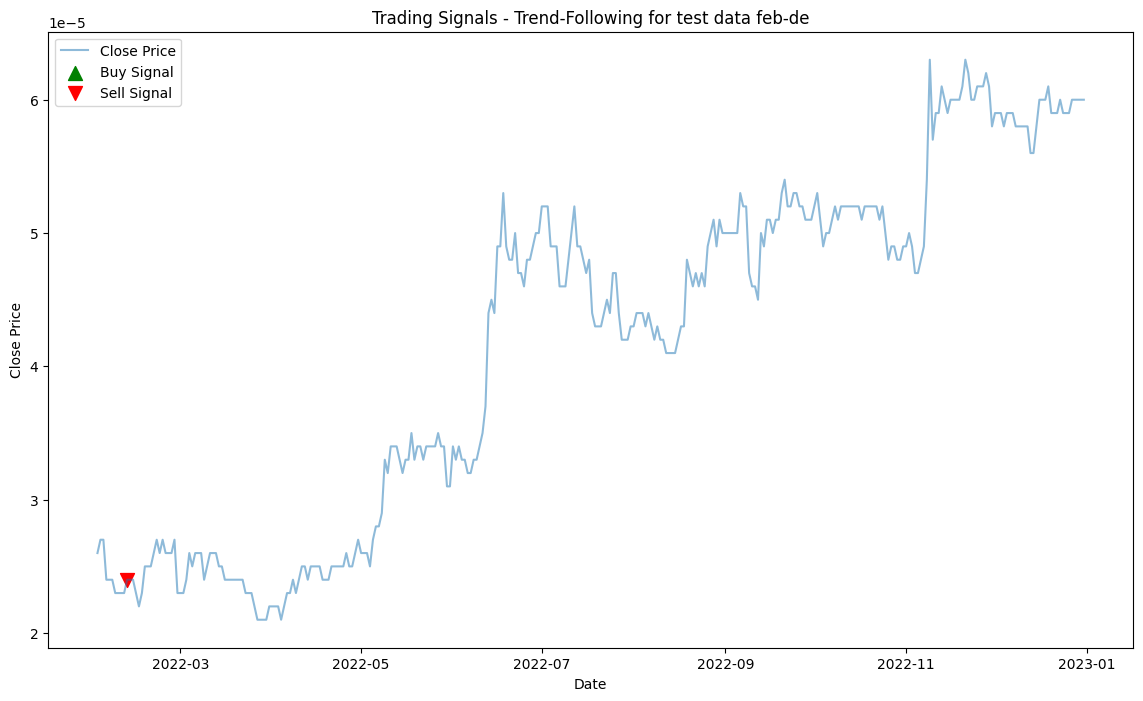

In [55]:
# Backtest and Analyze Trend-Following Strategy for test data feb-dec
signals_trend_following = trend_strategy(test1_btcdata)
test1_btcdata_backtest_trend_following, trend_following_annual_returns, trend_following_drawdown = backtest_strategy(test1_btcdata, signals_trend_following, transaction_cost_rate, slippage)
visualize_strategy(test1_btcdata, signals_trend_following, 'Trend-Following for test data feb-de')

Annual Returns: 20.21%
Maximum Drawdown: 3.85%



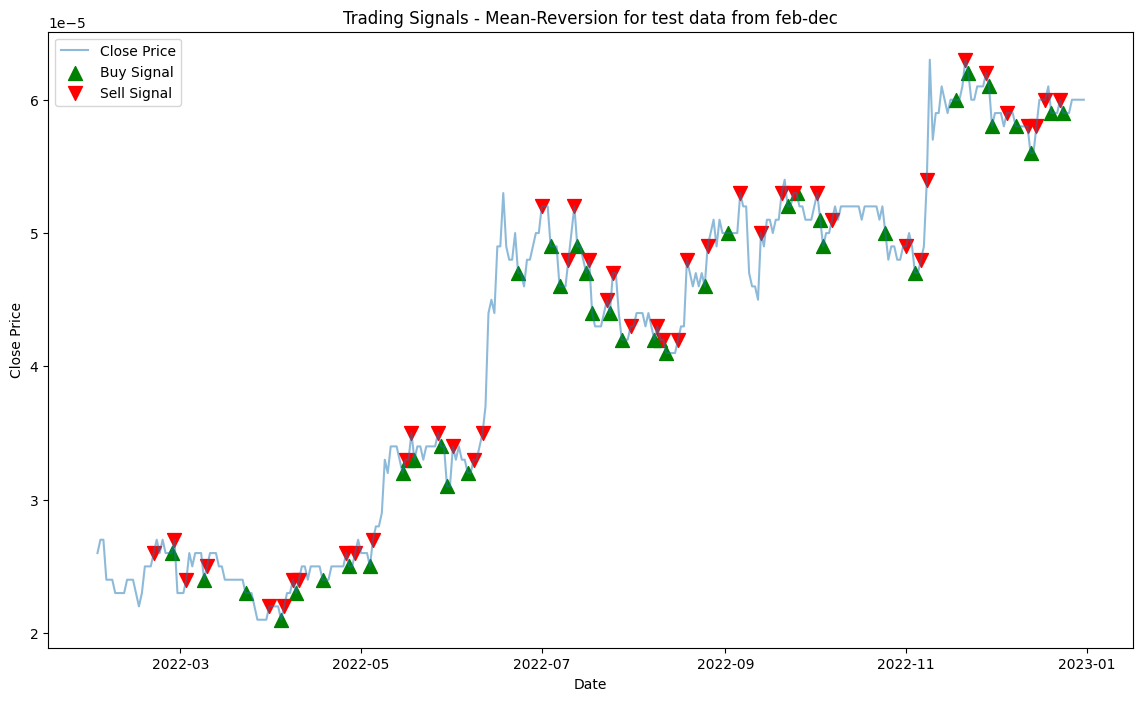

In [63]:
# Backtest and Analyze mean-reversion Strategy for test data
signals_mean_reversion = meanreversion_strategy(test1_btcdata)
test1_btcdata_backtest_mean_reversion, mean_reversion_annual_returns, mean_reversion_drawdown = backtest_strategy(test1_btcdata, signals_mean_reversion, transaction_cost_rate, slippage)
visualize_strategy(test1_btcdata, signals_mean_reversion, 'Mean-Reversion for test data from feb-dec')

Annual Returns: -6.63%
Maximum Drawdown: 8.70%



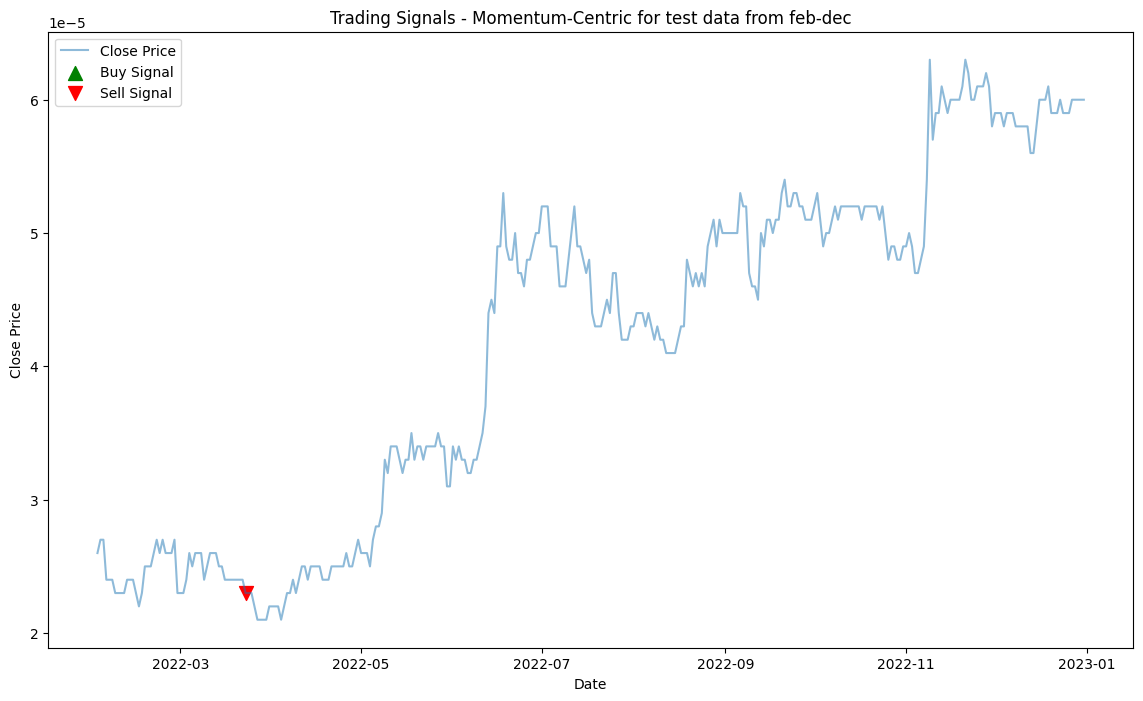

In [64]:
# Backtest and Analyze Momentum-Centric Strategy for test data feb-dec
signals_momentum_centric = momentumcentric_strategy(test1_btcdata)
test1_btc_data_backtest_momentum_centric, momentum_centric_annual_returns, momentum_centric_drawdown = backtest_strategy(test1_btcdata, signals_momentum_centric, transaction_cost_rate, slippage)
visualize_strategy(test1_btcdata, signals_momentum_centric, 'Momentum-Centric for test data from feb-dec')

In [61]:
# Backtest and analyze the trend-following strategy with risk management for test data jan-dec
btc_data_backtest = trend_followingstrategy_with_risk_management(test1_btcdata)


Additional Metrics:
Gross Profit: 0.0
Net Profit: Date
2022-02-01    0.0
2022-02-02    0.0
2022-02-03    0.0
2022-02-04    0.0
2022-02-05    0.0
             ... 
2022-12-27    0.0
2022-12-28    0.0
2022-12-29    0.0
2022-12-30    0.0
2022-12-31    0.0
Name: net_profit, Length: 334, dtype: float64
Total Closed Trades: Date
2022-02-01    0
2022-02-02    0
2022-02-03    0
2022-02-04    0
2022-02-05    0
             ..
2022-12-27    0
2022-12-28    0
2022-12-29    0
2022-12-30    0
2022-12-31    0
Name: total_closed_trades, Length: 334, dtype: int64
Win Rate: nan%
Max Drawdown: 19.23%
Average Winning Trade: Date
2022-02-01    0.0
2022-02-02    0.0
2022-02-03    0.0
2022-02-04    0.0
2022-02-05    0.0
             ... 
2022-12-27    0.0
2022-12-28    0.0
2022-12-29    0.0
2022-12-30    0.0
2022-12-31    0.0
Name: average_winning_trade, Length: 334, dtype: float64
Average Losing Trade: Date
2022-02-01    0.0
2022-02-02    0.0
2022-02-03    0.0
2022-02-04    0.0
2022-02-05    0.0
          

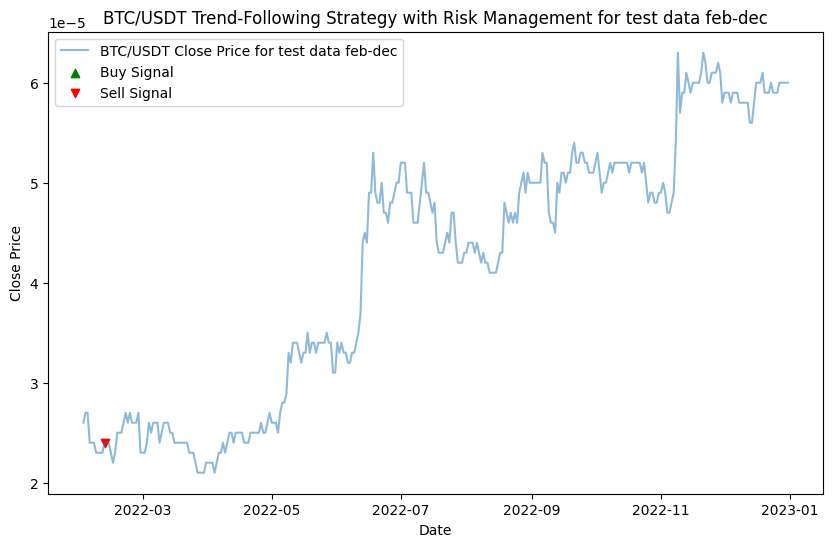

In [62]:
# Visualize the results (you may need to modify this based on your preferred visualization library)
plt.figure(figsize=(10, 6))
plt.plot(test1_btcdata['Close'], label='BTC/USDT Close Price for test data feb-dec', alpha=0.5)
buy_signals = btc_data_backtest.index[btc_data_backtest['positions'] == 1.0]
sell_signals = btc_data_backtest.index[btc_data_backtest['positions'] == -1.0]

plt.scatter(buy_signals, btc_data_backtest['Close'][btc_data_backtest['positions'] == 1.0], label='Buy Signal', marker='^', color='g')
plt.scatter(sell_signals, btc_data_backtest['Close'][btc_data_backtest['positions'] == -1.0], label='Sell Signal', marker='v', color='r')

plt.title('BTC/USDT Trend-Following Strategy with Risk Management for test data feb-dec')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()